**Sistemas Difusos**

* _Maria Alejandra Bonilla Diaz - 20251595002_ 
* _Alvaro Alejandro Zarabanda Gutierrez – 20251595006_
# Punto 1: Conjuntos difusos para temperatura de proceso industrial

Considere la siguiente función de pertenencia que describe 5 conjuntos fuzzy que representan la temperatura de un proceso industrial:

![Enunciado](./assets/enunciado_p1.png)

- **A:** Muy Baja
- **B:** Baja
- **C:** Media

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## a) Expresiones analíticas para cada conjunto fuzzy

Cada conjunto fuzzy se describe mediante una función de membresía, que indica el grado de pertenencia de cada valor de temperatura al conjunto. Las expresiones se obtienen observando los puntos de intersección y los valores máximos de la gráfica.

- **A: Muy Baja**
  
  $$
  \mu_A(x) = \begin{cases}
    1 & 0 \leq x \leq 5 \\
    \frac{15-x}{10} & 5 < x < 15 \\
    0 & x \geq 15
  \end{cases}
  $$
  Esta función es trapezoidal: es 1 en el intervalo [0,5], decrece linealmente hasta 0 en x=15.

- **B: Baja**
  
  $$
  \mu_B(x) = \begin{cases}
    0 & x \leq 5 \\
    \frac{x-5}{10} & 5 < x < 15 \\
    \frac{25-x}{10} & 15 \leq x < 25 \\
    0 & x \geq 25
  \end{cases}
  $$
  Es triangular, con máximo en x=15.

- **C: Media**
  
  $$
  \mu_C(x) = \begin{cases}
    0 & x \leq 15 \\
    \frac{x-15}{10} & 15 < x < 25 \\
    \frac{35-x}{10} & 25 \leq x < 35 \\
    0 & x \geq 35
  \end{cases}
  $$
  Es triangular, con máximo en x=25.

- **D: Alta**
  
  $$
  \mu_D(x) = \begin{cases}
    0 & x \leq 25 \\
    \frac{x-25}{10} & 25 < x < 35 \\
    \frac{45-x}{10} & 35 \leq x < 45 \\
    0 & x \geq 45
  \end{cases}
  $$
  Es triangular, con máximo en x=35.

- **E: Muy Alta**
  
  $$
  \mu_E(x) = \begin{cases}
    0 & x \leq 35 \\
    \frac{x-35}{10} & 35 < x < 45 \\
    1 & 45 \leq x \leq 50
  \end{cases}
  $$
  Es trapezoidal: crece linealmente entre 35 y 45, y es 1 en [45,50].


## b) Procedimiento computacional para mapear los conjuntos fuzzy

Para mapear los conjuntos fuzzy, se discretiza el universo de discurso (temperatura) en $N$ puntos (por ejemplo, $N=1000$). Para cada conjunto, se calcula el valor de la función de membresía en cada punto usando las expresiones analíticas anteriores. Esto permite visualizar y analizar los conjuntos fuzzy de manera computacional.

---

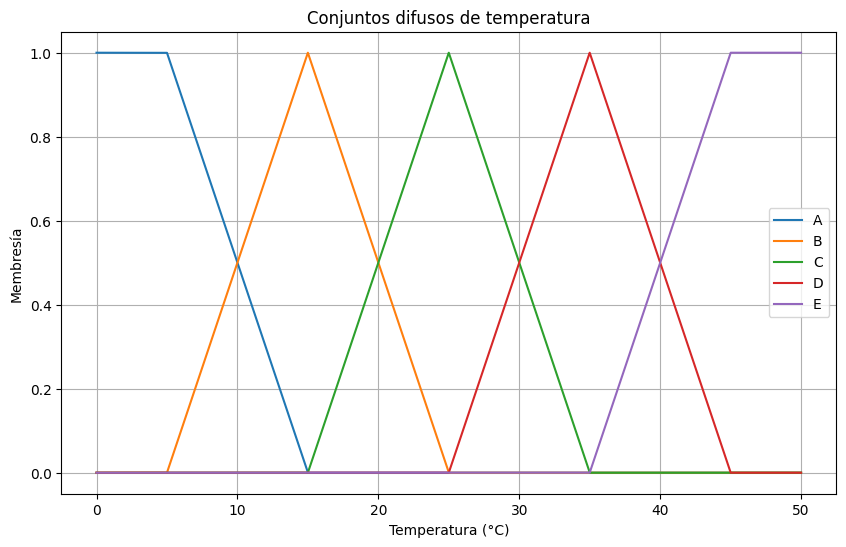

In [ ]:
def trapezoidal(x, a, m, n, b):
    x = np.asarray(x)
    valor = np.zeros_like(x, dtype=float)
    # Segmento izquierdo
    if m != a:
        mascara_izq = (x >= a) & (x < m)
        valor[mascara_izq] = (x[mascara_izq] - a) / (m - a)
    else:
        mascara_izq = (x >= a) & (x <= m)
        valor[mascara_izq] = 1
    # Segmento plano
    mascara_medio = (x >= m) & (x <= n)
    valor[mascara_medio] = 1
    # Segmento derecho
    if b != n:
        mascara_der = (x > n) & (x <= b)
        valor[mascara_der] = (b - x[mascara_der]) / (b - n)
    else:
        mascara_der = (x >= n) & (x <= b)
        valor[mascara_der] = 1
    # Fuera de soporte
    valor[(x < a) | (x > b)] = 0
    valor = np.clip(valor, 0, 1)
    return valor

def triangular(x, a, m, b):
    x = np.asarray(x)
    valor = np.zeros_like(x, dtype=float)
    # Lado izquierdo
    if m != a:
        mascara_izq = (x >= a) & (x <= m)
        valor[mascara_izq] = (x[mascara_izq] - a) / (m - a)
    else:
        mascara_izq = (x == a)
        valor[mascara_izq] = 1
    # Lado derecho
    if b != m:
        mascara_der = (x > m) & (x <= b)
        valor[mascara_der] = (b - x[mascara_der]) / (b - m)
    else:
        mascara_der = (x == b)
        valor[mascara_der] = 1
    # Fuera de soporte
    valor[(x < a) | (x > b)] = 0
    valor = np.clip(valor, 0, 1)
    return valor

# Parámetros de los conjuntos
conjuntos = {
    'A': {'tipo': 'trapezoidal', 'parametros': [0, 0, 5, 15]},
    'B': {'tipo': 'triangular', 'parametros': [5, 15, 25]},
    'C': {'tipo': 'triangular', 'parametros': [15, 25, 35]},
    'D': {'tipo': 'triangular', 'parametros': [25, 35, 45]},
    'E': {'tipo': 'trapezoidal', 'parametros': [35, 45, 50, 50]}
}

# Función general

def membresia_difusa(x, tipo, parametros):
    if tipo == 'triangular':
        return triangular(x, *parametros)
    elif tipo == 'trapezoidal':
        return trapezoidal(x, *parametros)
    else:
        raise ValueError('Tipo de función no soportado')

# b) Mapeo de conjuntos difusos

def mapear_conjuntos(n_puntos=1000):
    universo = np.linspace(0, 50, n_puntos)
    membresias = {nombre: membresia_difusa(universo, datos['tipo'], datos['parametros']) for nombre, datos in conjuntos.items()}
    return universo, membresias

universo, membresias = mapear_conjuntos(100000)

# Graficar
plt.figure(figsize=(10,6))
for nombre, y in membresias.items():
    plt.plot(universo, y, label=nombre)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Membresía')
plt.title('Conjuntos difusos de temperatura')
plt.legend()
plt.grid(True)
plt.show()

### Explicación del código del inciso b)

El código define funciones generales para calcular la membresía de cualquier conjunto difuso, ya sea triangular o trapezoidal, evitando divisiones por cero. Los parámetros de cada conjunto se almacenan en un diccionario llamado `conjuntos`, donde se especifica el tipo y los valores característicos.

La función `mapear_conjuntos` discretiza el universo de temperatura en 1000 puntos y calcula la membresía de cada conjunto en todos esos puntos, generando los vectores necesarios para graficar las funciones de membresía. Finalmente, se visualizan todos los conjuntos difusos en una sola gráfica para comparar sus formas y solapamientos.

Este procedimiento permite analizar y visualizar cómo se distribuyen los grados de pertenencia para cada conjunto fuzzy en el rango de temperaturas estudiado.

## c) Procedimiento para identificar conjuntos activos

Un conjunto fuzzy está activo para un valor $x$ si su función de membresía es mayor que cero en ese punto. El procedimiento consiste en evaluar todas las funciones de membresía en $x$ y listar aquellos conjuntos cuyo valor es positivo. Esto permite saber, para cualquier temperatura, qué conjuntos fuzzy la representan parcialmente.

---

In [ ]:
def conjuntos_activos(x):
    activos = []
    for nombre, datos in conjuntos.items():
        mu = membresia_difusa(np.array([x]), datos['tipo'], datos['parametros'])[0]
        if mu > 0:
            activos.append((nombre, mu))
    return activos

# Ejemplo de uso
x_ejemplo = 10
activos = conjuntos_activos(x_ejemplo)
print(f'Conjuntos activos en x={x_ejemplo}:', activos)

Conjuntos activos en x=10: [('A', np.float64(0.5)), ('B', np.float64(0.5))]


### Explicación del código del inciso c)

El procedimiento para identificar los conjuntos difusos activos consiste en evaluar la función de membresía de cada conjunto para un valor específico de temperatura `x`. Si el resultado es mayor que cero, ese conjunto se considera activo para ese valor.

La función recorre todos los conjuntos definidos y retorna una lista con los nombres y el grado de pertenencia de los conjuntos que están activos en ese punto. Esto permite saber, para cualquier temperatura, qué etiquetas fuzzy la representan y con qué intensidad.

## d) Procedimiento para calcular el nivel de pertenencia

El nivel de pertenencia de un conjunto fuzzy para un valor $x$ es simplemente el valor de la función de membresía correspondiente en ese punto. Se evalúa la función analítica del conjunto en $x$ y se retorna el resultado, que estará en el rango [0,1].

---

In [ ]:
def nivel_pertenencia(nombre, x):
    datos = conjuntos[nombre]
    return membresia_difusa(np.array([x]), datos['tipo'], datos['parametros'])[0]

x_ejemplo = 25
nivel = nivel_pertenencia('C', x_ejemplo)
print(f'Nivel de pertenencia de C en x={x_ejemplo}:', nivel)

Nivel de pertenencia de C en x=25: 1.0


### Explicación del código del inciso d)

El procedimiento para calcular el nivel de pertenencia de un conjunto difuso dado un valor de temperatura `x` consiste en evaluar la función de membresía correspondiente en ese punto. El resultado es un valor entre 0 y 1 que indica el grado de pertenencia de `x` al conjunto seleccionado.

Este valor es útil para tomar decisiones basadas en lógica difusa, ya que permite cuantificar la pertenencia parcial de un valor a una etiqueta lingüística (por ejemplo, "media" o "alta").

## e) Procedimiento para obtener el conjunto crisp del $\alpha$-corte

El $\alpha$-corte de un conjunto fuzzy es el subconjunto de valores del universo de discurso donde la función de membresía es mayor o igual a $\alpha$. Computacionalmente, se evalúa la función de membresía en todos los puntos discretizados y se seleccionan aquellos que cumplen la condición. El resultado es el conjunto crisp correspondiente al $\alpha$-corte.

In [ ]:
def alpha_corte(nombre, alpha, universo):
    datos = conjuntos[nombre]
    mu = membresia_difusa(universo, datos['tipo'], datos['parametros'])
    return universo[mu >= alpha]

alpha = 0.999
corte = alpha_corte('C', alpha, universo)
print(f'α-corte de C para α={alpha}:', corte)

α-corte de C para α=0.999: [24.9902499  24.99074991 24.99124991 24.99174992 24.99224992 24.99274993
 24.99324993 24.99374994 24.99424994 24.99474995 24.99524995 24.99574996
 24.99624996 24.99674997 24.99724997 24.99774998 24.99824998 24.99874999
 24.99924999 24.99975    25.00025    25.00075001 25.00125001 25.00175002
 25.00225002 25.00275003 25.00325003 25.00375004 25.00425004 25.00475005
 25.00525005 25.00575006 25.00625006 25.00675007 25.00725007 25.00775008
 25.00825008 25.00875009 25.00925009 25.0097501 ]


# Punto 2: Operaciones entre conjuntos difusos
En este punto se desarrollan procedimientos computacionales para realizar operaciones clásicas entre conjuntos difusos, utilizando las funciones de membresía definidas previamente. Para cada inciso se implementa una función específica y se muestra el gráfico correspondiente.

**a)** Graficar los cinco conjuntos fuzzy usando 50 y 1000 puntos de discretización. Explicar las diferencias.
**b)** Graficar la Unión (operador máximo) de los cinco conjuntos fuzzy usando 1000 puntos.
**c)** Graficar la Intersección entre conjuntos activos (operador mínimo solo entre los conjuntos con membresía > 0) usando 500 puntos.
**d)** Graficar el complemento del conjunto fuzzy C.
Cada gráfico se presenta por separado para facilitar la interpretación.

### Inciso a) Discretización de conjuntos difusos
Se grafican los cinco conjuntos difusos utilizando 50 y 1000 puntos de discretización. Con pocos puntos, las curvas se ven escalonadas y menos precisas, mientras que con muchos puntos se obtiene una representación suave y fiel a la función analítica. Una mayor discretización mejora la visualización y precisión en cálculos posteriores, aunque requiere más recursos computacionales.

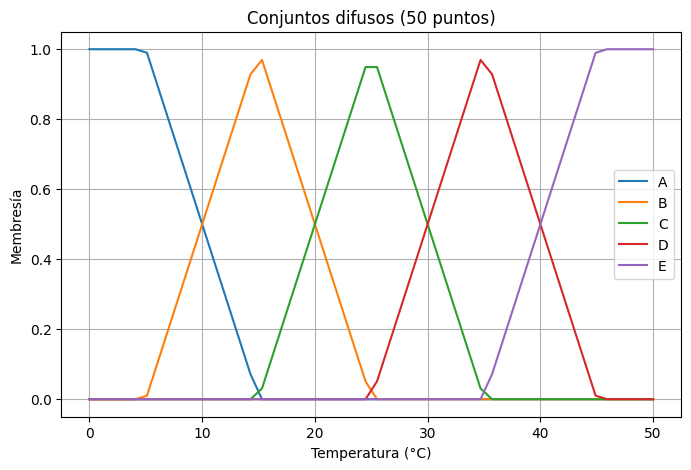

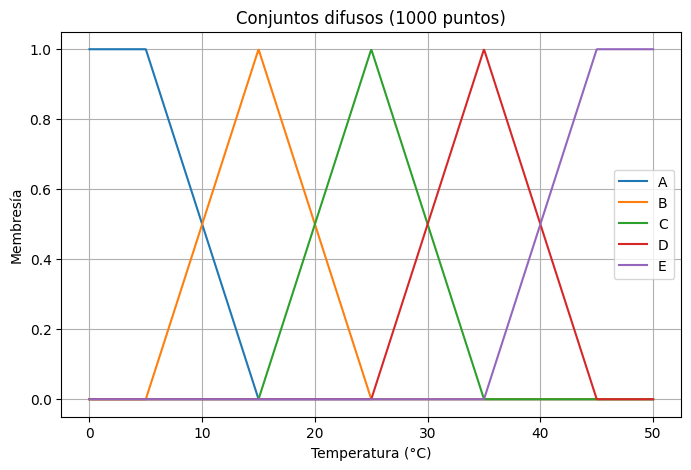

In [ ]:
# Funciones para operaciones difusas
def graficar_conjuntos(n_puntos):
    universo, membresias = mapear_conjuntos(n_puntos)
    plt.figure(figsize=(8,5))
    for nombre, y in membresias.items():
        plt.plot(universo, y, label=nombre)
    plt.title(f'Conjuntos difusos ({n_puntos} puntos)')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Membresía')
    plt.legend()
    plt.grid(True)
    plt.show()
    return universo, membresias


# a) Graficar los cinco conjuntos fuzzy con 50 y 1000 puntos de discretización
_=graficar_conjuntos(50)
_=graficar_conjuntos(1000)



### Inciso b) Unión de conjuntos difusos
La unión de los cinco conjuntos difusos se calcula usando el operador máximo. Para cada valor de temperatura, se toma el mayor grado de pertenencia entre todos los conjuntos. Esto permite identificar los rangos donde al menos uno de los conjuntos está activo y con qué intensidad. Es útil para modelar situaciones donde basta con que un conjunto esté activo para considerar la pertenencia.

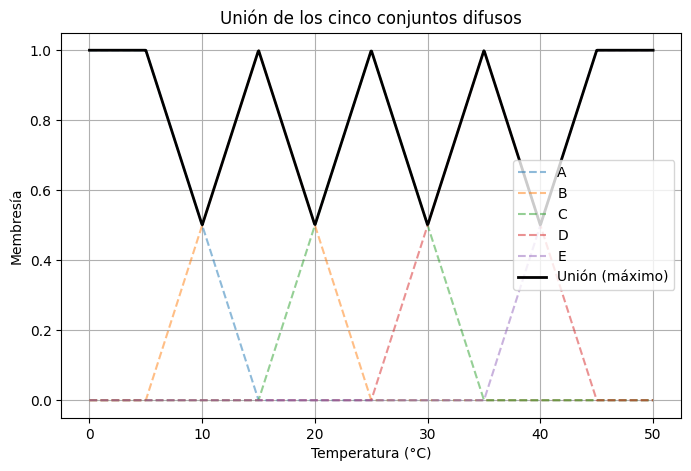

In [ ]:
# b) Graficar la unión de los cinco conjuntos fuzzy (1000 puntos)

def union_max(membresias):
    return np.maximum.reduce(list(membresias.values()))

def graficar_union(n_puntos):
    universo, membresias = mapear_conjuntos(n_puntos)
    union = union_max(membresias)
    plt.figure(figsize=(8,5))
    for nombre, y in membresias.items():
        plt.plot(universo, y, '--', alpha=0.5, label=nombre)
    plt.plot(universo, union, 'k', linewidth=2, label='Unión (máximo)')
    plt.title('Unión de los cinco conjuntos difusos')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Membresía')
    plt.legend()
    plt.grid(True)
    plt.show()
    return universo, union

_=graficar_union(1000)

### Inciso c) Intersección entre conjuntos difusos activos
La intersección se calcula tomando el mínimo entre los grados de pertenencia de los conjuntos en cada punto. Esto significa que la intersección solo es positiva en los intervalos donde al menos dos conjuntos se solapan. Es útil para modelar situaciones donde se requiere coincidencia entre etiquetas difusas.

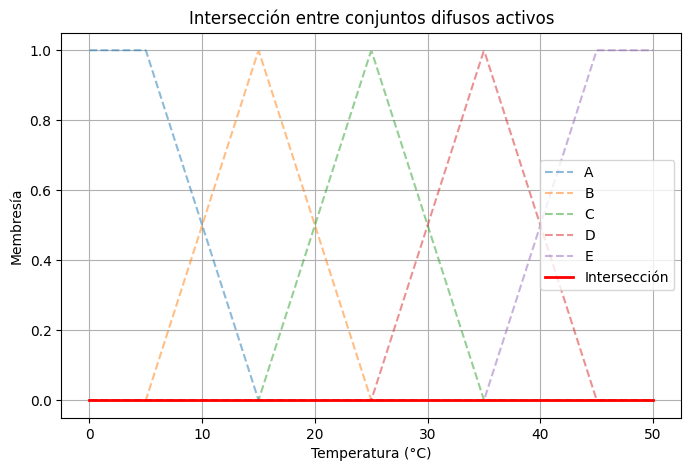

In [ ]:

# c) Graficar la intersección entre conjuntos (500 puntos)

def interseccion_min(membresias):
    arr = np.array(list(membresias.values()))
    resultado = np.zeros(arr.shape[1])
    for i in range(arr.shape[1]):
        activos = arr[:, i][arr[:, i] >= 0]
        resultado[i] = np.min(activos) if len(activos) > 0 else 0
    return resultado

def graficar_interseccion_activos(n_puntos):
    universo, membresias = mapear_conjuntos(n_puntos)
    interseccion = interseccion_min(membresias)
    plt.figure(figsize=(8,5))
    for nombre, y in membresias.items():
        plt.plot(universo, y, '--', alpha=0.5, label=nombre)
    plt.plot(universo, interseccion, 'r', linewidth=2, label='Intersección')
    plt.title('Intersección entre conjuntos difusos activos')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Membresía')
    plt.legend()
    plt.grid(True)
    plt.show()
    return universo, interseccion


_=graficar_interseccion_activos(500)


### Inciso d) Complemento del conjunto fuzzy C
El complemento de un conjunto difuso indica el grado en que un valor NO pertenece al conjunto. Se calcula como 1 menos el grado de pertenencia del conjunto C en cada punto. Es útil para definir restricciones, exclusiones o reglas en sistemas difusos.

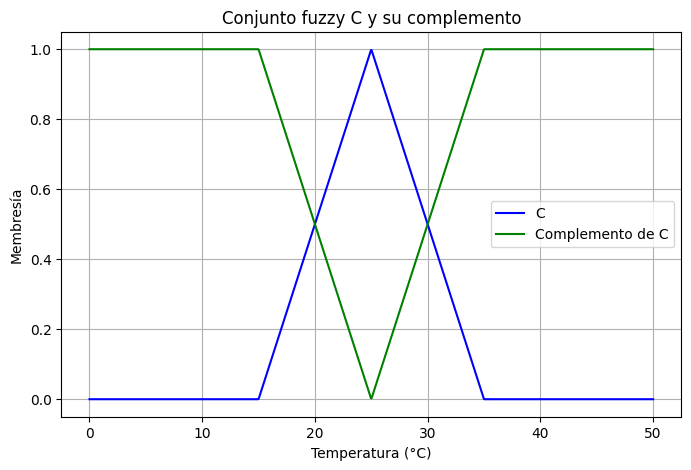

In [ ]:
# d) Graficar el complemento del conjunto fuzzy C (1000 puntos)

def complemento_conjunto(membresias, nombre):
    return 1 - membresias[nombre]

def graficar_complemento_C(n_puntos):
    universo, membresias = mapear_conjuntos(n_puntos)
    complemento = complemento_conjunto(membresias, 'C')
    plt.figure(figsize=(8,5))
    plt.plot(universo, membresias['C'], 'b', label='C')
    plt.plot(universo, complemento, 'g', label='Complemento de C')
    plt.title('Conjunto fuzzy C y su complemento')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Membresía')
    plt.legend()
    plt.grid(True)
    plt.show()
    return universo, complemento
_=graficar_complemento_C(1000)

### Explicación e interpretación de los resultados del Punto 3
En este ejercicio se analizan las operaciones de unión e intersección entre los conjuntos difusos activos para valores específicos de temperatura, utilizando los operadores máximo (unión) y mínimo (intersección) sobre los conjuntos identificados como activos.

**Unión de conjuntos activos:**
- Para cada temperatura dada (x=16.75 y x=37.29), se identifican los conjuntos difusos cuya función de membresía es mayor que cero (activos).
- La unión se calcula tomando el máximo de las funciones de membresía de los conjuntos activos en cada punto del universo de temperatura.
- El resultado representa el grado de pertenencia más alto que puede alcanzar cualquier conjunto activo para cada temperatura.

**Intersección de conjuntos activos:**
- Para x=20 y x=40, se identifican los conjuntos activos y se calcula la intersección usando el operador mínimo.
- La intersección muestra los rangos donde los conjuntos activos se solapan y el grado de pertenencia más bajo entre ellos.
- Es útil para identificar zonas de ambigüedad o transición entre etiquetas difusas.

**Interpretación de la gráfica:**
- Cada curva representa la operación (unión o intersección) entre los conjuntos activos para una temperatura específica.
- La unión suele abarcar un rango más amplio y mostrar los máximos grados de pertenencia, mientras que la intersección es más restrictiva y resalta las zonas de solapamiento.
- Visualizar todas las curvas en la misma figura permite comparar cómo varían las operaciones según la temperatura elegida y entender la dinámica de los conjuntos difusos en el sistema.

Estas operaciones son fundamentales en lógica difusa para la toma de decisiones, ya que permiten combinar información de diferentes etiquetas lingüísticas y modelar la incertidumbre inherente a variables físicas como la temperatura.

In [ ]:
# Punto 3 (versión simplificada): Usando funciones ya existentes para unión e intersección
universo = np.linspace(0, 50, 1000)

def membresias_activos(x, universo):
    activos = conjuntos_activos(x)
    return {nombre: membresia_difusa(universo, conjuntos[nombre]['tipo'], conjuntos[nombre]['parametros']) for nombre, _ in activos}

# a) Unión de conjuntos activos en x=16.75
membresias_16_75 = membresias_activos(16.75, universo)
union_16_75 = union_max(membresias_16_75)

# b) Unión de conjuntos activos en x=37.29
membresias_37_29 = membresias_activos(37.29, universo)
union_37_29 = union_max(membresias_37_29)

# c) Intersección de conjuntos activos en x=20
membresias_20 = membresias_activos(20, universo)
interseccion_20 = interseccion_min(membresias_20)

# d) Intersección de conjuntos activos en x=40
membresias_40 = membresias_activos(40, universo)
interseccion_40 = interseccion_min(membresias_40)

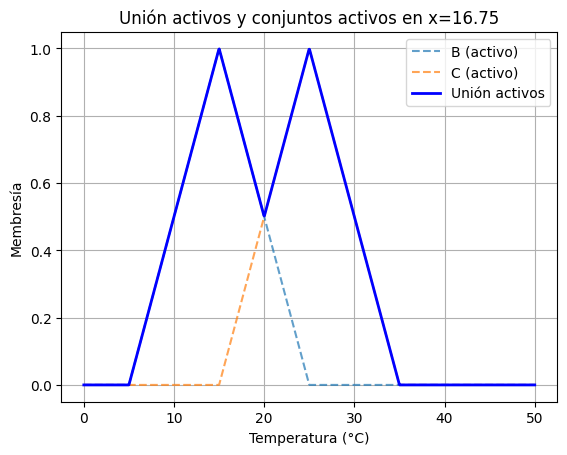

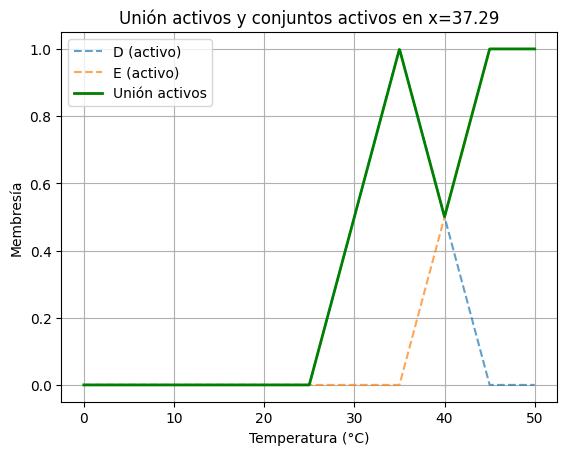

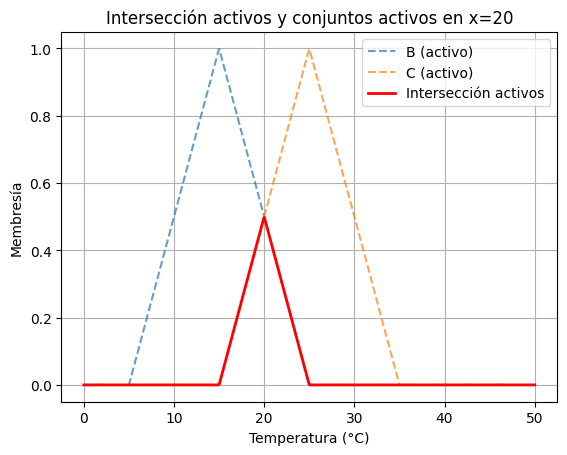

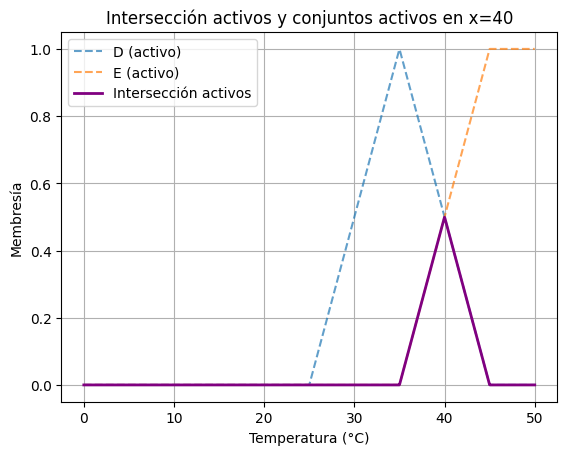

In [ ]:
# Gráficos separados mostrando solo los conjuntos fuzzy activos en cada caso
def plot_activos(x, universo, resultado, color, titulo):
    activos = conjuntos_activos(x)
    nombres = [nombre for nombre, _ in activos]
    for nombre in nombres:
        y = membresia_difusa(universo, conjuntos[nombre]['tipo'], conjuntos[nombre]['parametros'])
        plt.plot(universo, y, '--', alpha=0.7, label=f'{nombre} (activo)')
    plt.plot(universo, resultado, color=color, linewidth=2, label=titulo)
    plt.title(f'{titulo} y conjuntos activos en x={x}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Membresía')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_activos(16.75, universo, union_16_75, 'blue', 'Unión activos')
plot_activos(37.29, universo, union_37_29, 'green', 'Unión activos')
plot_activos(20, universo, interseccion_20, 'red', 'Intersección activos')
plot_activos(40, universo, interseccion_40, 'purple', 'Intersección activos')

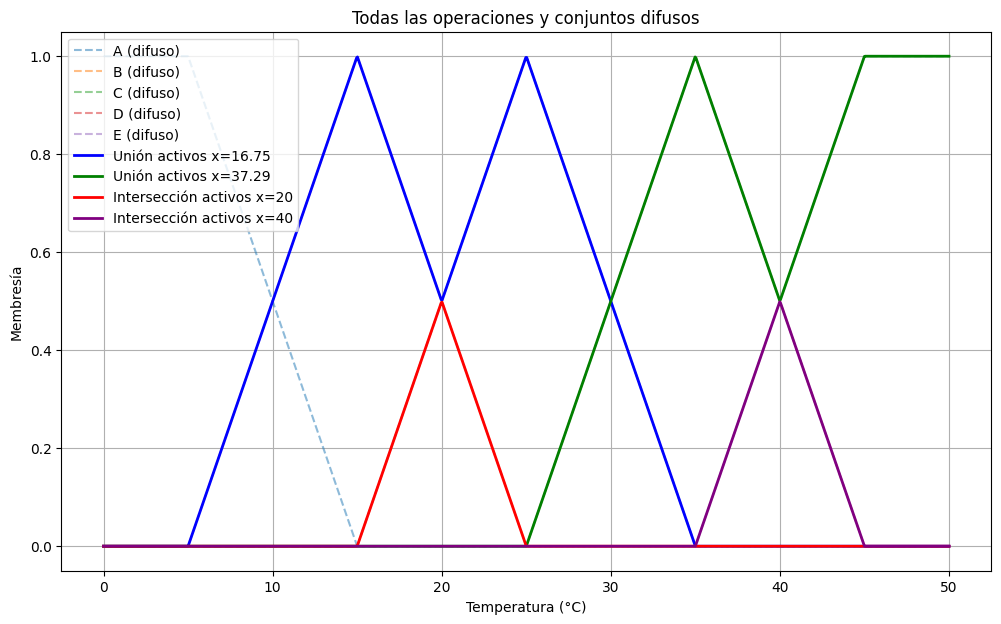

In [ ]:
# Gráfico conjunto: todas las operaciones y todos los conjuntos difusos en la misma figura
_, membresias_todos = mapear_conjuntos(1000)
plt.figure(figsize=(12,7))
for nombre, y in membresias_todos.items():
    plt.plot(universo, y, '--', alpha=0.5, label=f'{nombre} (difuso)')
plt.plot(universo, union_16_75, color='blue', linewidth=2, label='Unión activos x=16.75')
plt.plot(universo, union_37_29, color='green', linewidth=2, label='Unión activos x=37.29')
plt.plot(universo, interseccion_20, color='red', linewidth=2, label='Intersección activos x=20')
plt.plot(universo, interseccion_40, color='purple', linewidth=2, label='Intersección activos x=40')
plt.title('Todas las operaciones y conjuntos difusos')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Membresía')
plt.legend()
plt.grid(True)
plt.show()

## Punto 4: Operaciones con Suma y Producto Algebraico

En este punto se repite el ejercicio anterior, pero utilizando los operadores de suma algebraica para la unión y producto algebraico para la intersección de conjuntos difusos.

- **Unión (Suma Algebraica):** $\mu_{A \cup B}(x) = \mu_A(x) + \mu_B(x) - \mu_A(x) \cdot \mu_B(x)$
- **Intersección (Producto Algebraico):** $\mu_{A \cap B}(x) = \mu_A(x) \cdot \mu_B(x)$

Se implementan funciones para estas operaciones y se grafican los resultados de la misma manera que en el punto anterior, mostrando todos los gráficos en una sola figura.

In [ ]:
# --- Operadores algebraicos para conjuntos difusos ---
def union_suma_algebraica(membresias):
    vals = list(membresias.values())
    resultado = vals[0].copy()
    for arr in vals[1:]:
        resultado = resultado + arr - resultado * arr
    return np.clip(resultado, 0, 1)

def interseccion_producto_algebraico(membresias):
    vals = list(membresias.values())
    resultado = vals[0].copy()
    for arr in vals[1:]:
        resultado = resultado * arr
    return np.clip(resultado, 0, 1)

In [ ]:
# --- Operaciones fuzzy con suma y producto algebraico ---
universo = np.linspace(0, 50, 1000)

def membresias_activos(x, universo):
    activos = conjuntos_activos(x)
    return {nombre: membresia_difusa(universo, conjuntos[nombre]['tipo'], conjuntos[nombre]['parametros']) for nombre, _ in activos}

# a) Unión algebraica de conjuntos activos en x=16.75
membresias_16_75_alg = membresias_activos(16.75, universo)
union_16_75_alg = union_suma_algebraica(membresias_16_75_alg)

# b) Unión algebraica de conjuntos activos en x=37.29
membresias_37_29_alg = membresias_activos(37.29, universo)
union_37_29_alg = union_suma_algebraica(membresias_37_29_alg)

# c) Intersección algebraica de conjuntos activos en x=20
membresias_20_alg = membresias_activos(20, universo)
interseccion_20_alg = interseccion_producto_algebraico(membresias_20_alg)

# d) Intersección algebraica de conjuntos activos en x=40
membresias_40_alg = membresias_activos(40, universo)
interseccion_40_alg = interseccion_producto_algebraico(membresias_40_alg)

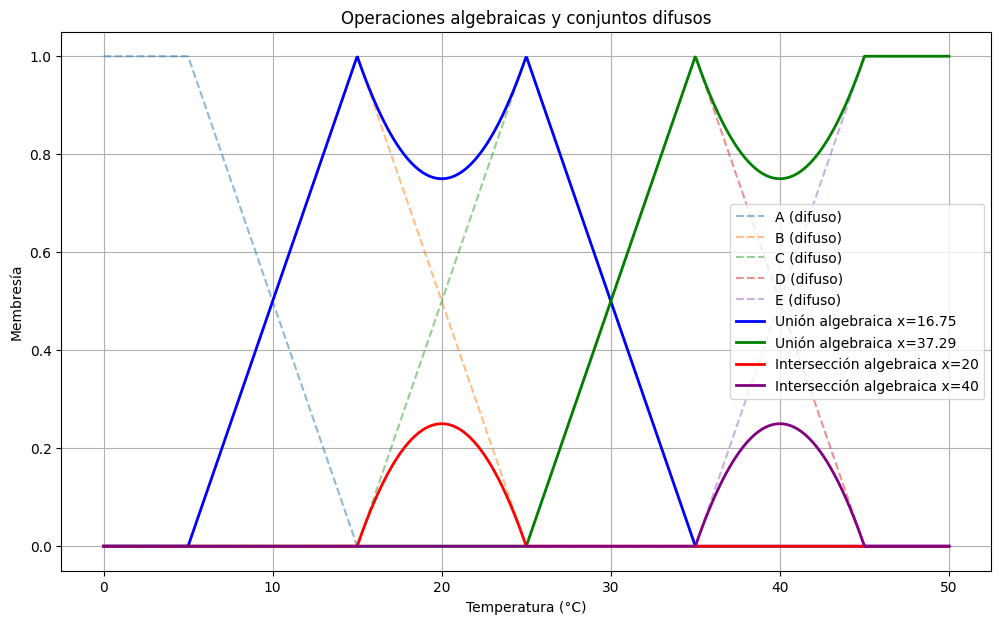

In [ ]:
# Gráfico conjunto: suma y producto algebraico de todas las operaciones y conjuntos difusos
_, membresias_todos = mapear_conjuntos(1000)
plt.figure(figsize=(12,7))
for nombre, y in membresias_todos.items():
    plt.plot(universo, y, '--', alpha=0.5, label=f'{nombre} (difuso)')
plt.plot(universo, union_16_75_alg, color='blue', linewidth=2, label='Unión algebraica x=16.75')
plt.plot(universo, union_37_29_alg, color='green', linewidth=2, label='Unión algebraica x=37.29')
plt.plot(universo, interseccion_20_alg, color='red', linewidth=2, label='Intersección algebraica x=20')
plt.plot(universo, interseccion_40_alg, color='purple', linewidth=2, label='Intersección algebraica x=40')
plt.title('Operaciones algebraicas y conjuntos difusos')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Membresía')
plt.legend()
plt.grid(True)
plt.show()

### Interpretación de los resultados con operadores algebraicos
Los operadores de suma y producto algebraico generan curvas más suaves y conservadoras que los operadores máximo y mínimo. La unión algebraica tiende a valores altos cuando varios conjuntos tienen membresía significativa, pero nunca supera el valor máximo. La intersección algebraica es más restrictiva, mostrando valores bajos salvo cuando todos los conjuntos activos tienen membresía alta. Esto permite modelar la combinación de información difusa de manera menos extrema, útil en sistemas donde se busca una agregación gradual y realista.

In [ ]:
# --- Punto 5: Operaciones compuestas entre conjuntos difusos ---
universo, membresias = mapear_conjuntos(1000)

# a) A ∪ B ∪ C
op_a = union_max({k: membresias[k] for k in ['A', 'B', 'C']})

# b) B ∩ (C ∪ D)
union_c_d = union_max({k: membresias[k] for k in ['C', 'D']})
op_b = interseccion_min({'B': membresias['B'], 'C∪D': union_c_d})

# c) (A ∩ B) ∪ (B ∩ C)
inter_a_b = interseccion_min({'A': membresias['A'], 'B': membresias['B']})
inter_b_c = interseccion_min({'B': membresias['B'], 'C': membresias['C']})
op_c = union_max({'A∩B': inter_a_b, 'B∩C': inter_b_c})

# d) ¬A ∪ (B ∩ C) ∪ ¬D
comp_a = complemento_conjunto(membresias, 'A')
inter_b_c = interseccion_min({'B': membresias['B'], 'C': membresias['C']})
comp_d = complemento_conjunto(membresias, 'D')
op_d = union_max({'¬A': comp_a, 'B∩C': inter_b_c, '¬D': comp_d})

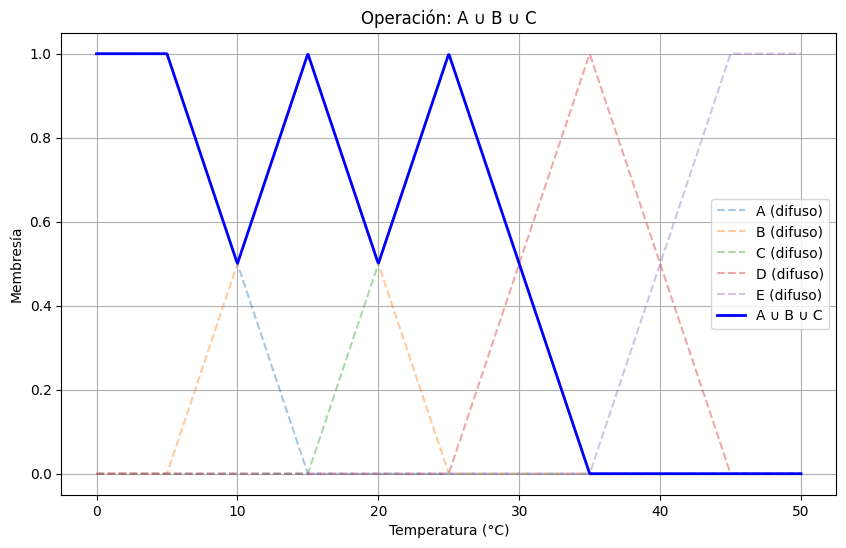

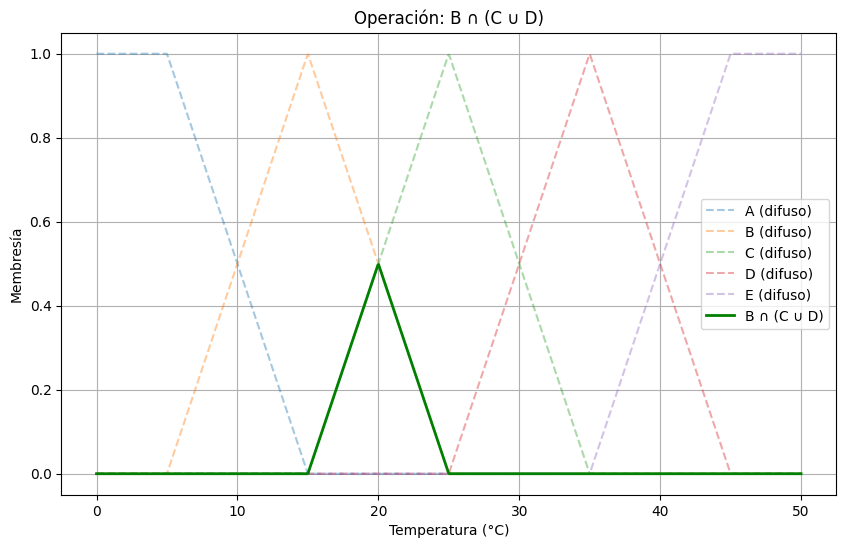

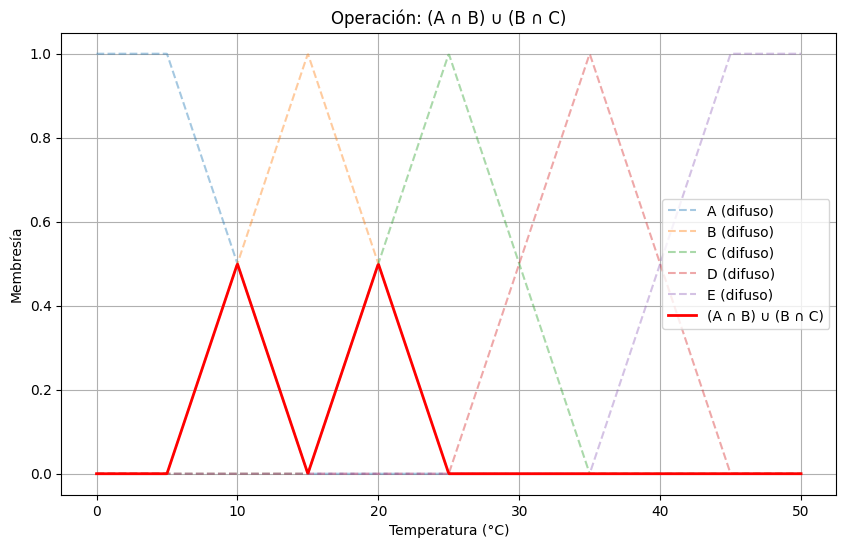

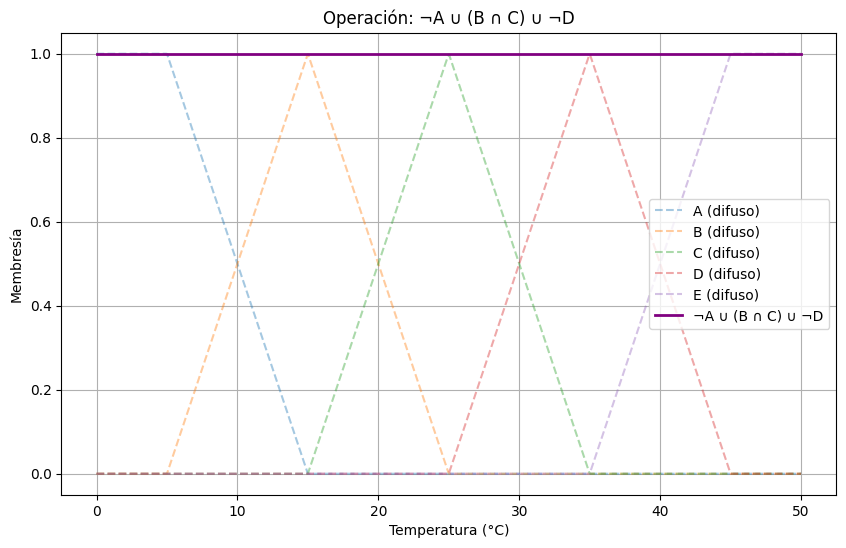

In [ ]:
# --- Gráficos separados para cada operación compuesta del punto 5 ---
operaciones = [
    (op_a, 'A ∪ B ∪ C', 'blue'),
    (op_b, 'B ∩ (C ∪ D)', 'green'),
    (op_c, '(A ∩ B) ∪ (B ∩ C)', 'red'),
    (op_d, '¬A ∪ (B ∩ C) ∪ ¬D', 'purple')
    ]

for resultado, titulo, color in operaciones:
    plt.figure(figsize=(10,6))
    for nombre, y in membresias.items():
        plt.plot(universo, y, '--', alpha=0.4, label=f'{nombre} (difuso)')
    plt.plot(universo, resultado, color=color, linewidth=2, label=titulo)
    plt.title(f'Operación: {titulo}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Membresía')
    plt.legend()
    plt.grid(True)
    plt.show()

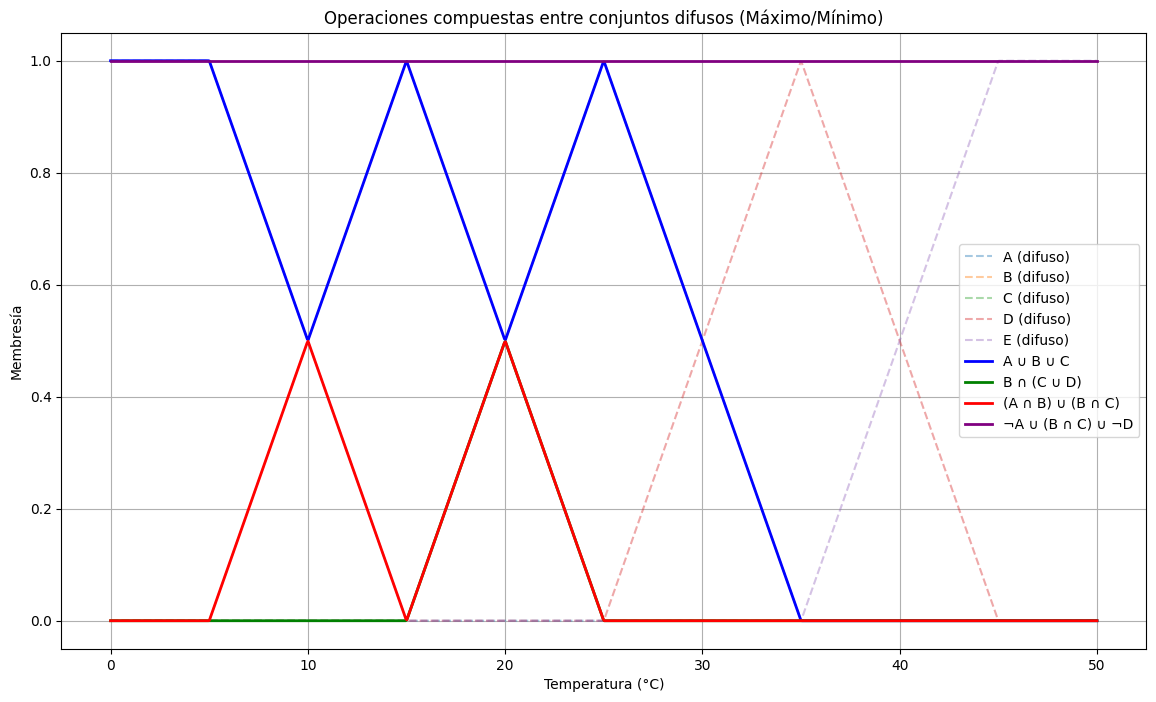

In [ ]:
# --- Gráfico conjunto ---
plt.figure(figsize=(14,8))
for nombre, y in membresias.items():
    plt.plot(universo, y, '--', alpha=0.4, label=f'{nombre} (difuso)')
plt.plot(universo, op_a, color='blue', linewidth=2, label='A ∪ B ∪ C')
plt.plot(universo, op_b, color='green', linewidth=2, label='B ∩ (C ∪ D)')
plt.plot(universo, op_c, color='red', linewidth=2, label='(A ∩ B) ∪ (B ∩ C)')
plt.plot(universo, op_d, color='purple', linewidth=2, label='¬A ∪ (B ∩ C) ∪ ¬D')
plt.title('Operaciones compuestas entre conjuntos difusos (Máximo/Mínimo)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Membresía')
plt.legend()
plt.grid(True)
plt.show()